# Getting started with pre-requisities for data processing and model building

In [1]:
#Install the required libraries 
!pip install h2o
!pip install catboost

     |████████████████████████████████| 164.8 MB 63 kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.4-py2.py3-none-any.whl size=164871668 sha256=4bde8fb53e525093cf848b4567e4ad0073e316c7cad1e43b891a92e369c2995b
  Stored in directory: /root/.cache/pip/wheels/c5/81/35/b2bcb5e7953976e6595c8dc940c70056a3ec85132e37d5b200
Successfully built h2o
     |████████████████████████████████| 69.2 MB 4.4 kB/s 


In [28]:
#import the required libraries for data processing, model building, and for visualisation needs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
import tensorflow as tf

# Preprocessing and EDA

In [3]:
#read the dataset file as dataframe
dataframe = pd.read_csv('/content/test_scores.csv')

In [4]:
#ensure the dataframe file and it's data
dataframe.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
5,ANKYI,Urban,Non-public,6OL,Standard,20.0,7YZO8,Female,Does not qualify,66.0,74.0
6,ANKYI,Urban,Non-public,6OL,Standard,20.0,9KMZD,Male,Does not qualify,63.0,75.0
7,ANKYI,Urban,Non-public,6OL,Standard,20.0,9USQK,Female,Does not qualify,63.0,72.0
8,ANKYI,Urban,Non-public,6OL,Standard,20.0,CS5QP,Male,Does not qualify,64.0,77.0
9,ANKYI,Urban,Non-public,6OL,Standard,20.0,D6HT8,Female,Does not qualify,61.0,72.0


In [5]:
#getting to know public vs non-public schools
dataframe.school_type.value_counts()

Public        1582
Non-public     551
Name: school_type, dtype: int64

In [7]:
#understanding the distribution of schools in the dataset
dataframe.school.value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

23


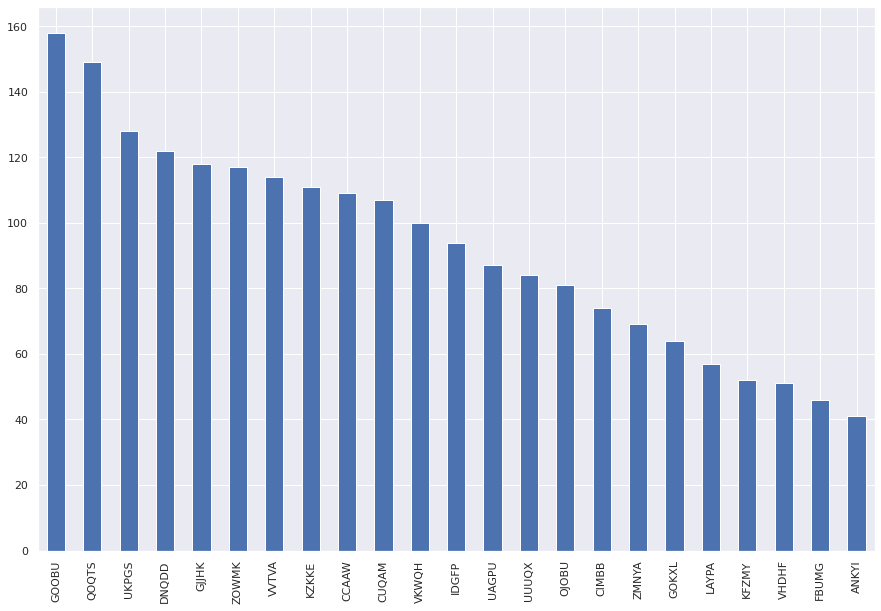

In [8]:
#total number of schools in the dataset
print(dataframe.school.value_counts().count())
dataframe.school.value_counts().plot(kind='bar')

In [9]:
#understanding the statistical measures of the dataset
dataframe.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [10]:
#get detailed information about the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


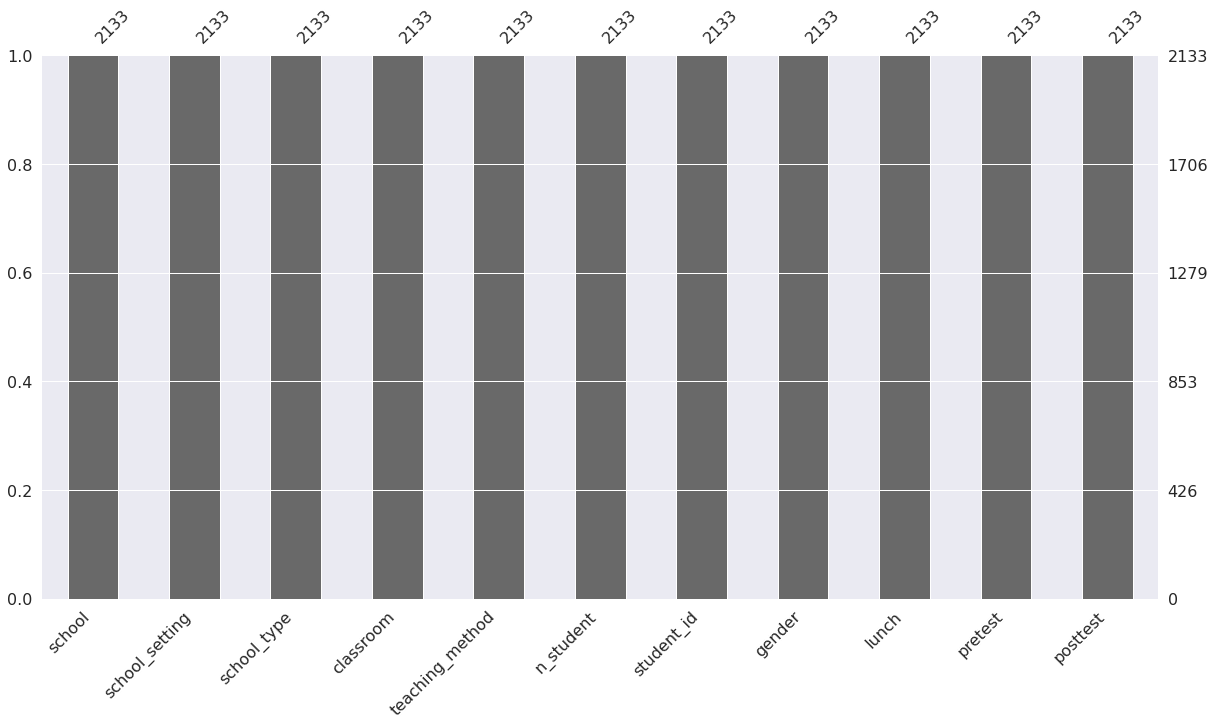

In [11]:
#check for missing data and if you have any - treat it with imputation methods
mis.bar(dataframe, figsize=(20,10))
plt.show()

In [12]:
#features in the dataset
dataframe.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [13]:
#creating a function to understand the uniqueness of each feature
def find_unique_classes(df):
  for col in df:
    print(col,"==",df[col].unique()," and the count is {}".format(len(df[col].unique())))
    print('\n')

In [14]:
#calling the function to get the uniqueness of each feature
find_unique_classes(dataframe)

school == ['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']  and the count is 23


school_setting == ['Urban' 'Suburban' 'Rural']  and the count is 3


school_type == ['Non-public' 'Public']  and the count is 2


classroom == ['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A93' 'TB5' 'YTB' '1UU' '4NN' 'V77' 'CII' 'Q0E' 'QA2'
 'ZBH']  and the count is 97


teaching_method == ['

In [6]:
#set the figsize for seaborn plots that will be generated in the following cells or in future.
sns.set(rc={'figure.figsize':(15,10)})

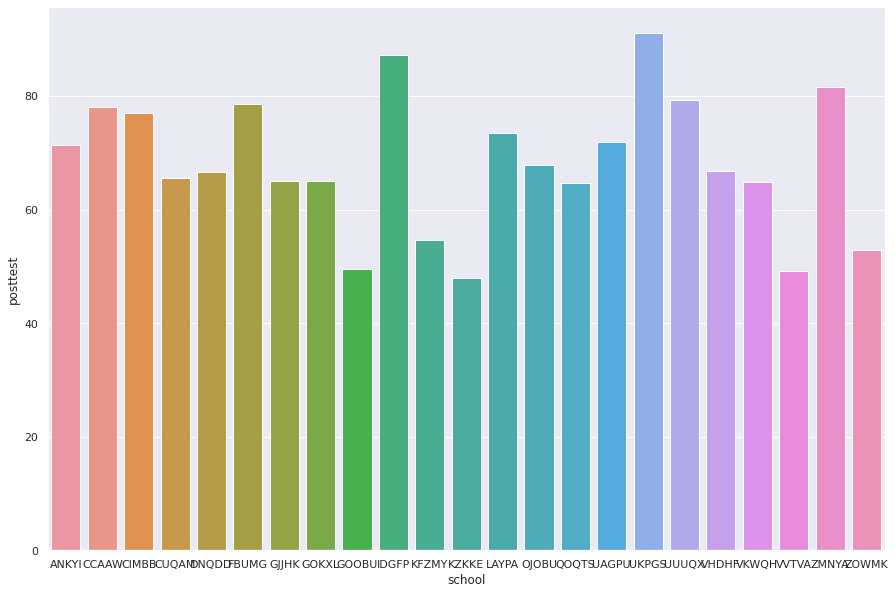

In [16]:
#check whether school has any impact on posttest 
based_on_school = dataframe.groupby(['school']).agg({'posttest':'mean'}).reset_index()
fig = sns.barplot(data = based_on_school,x='school',y='posttest')

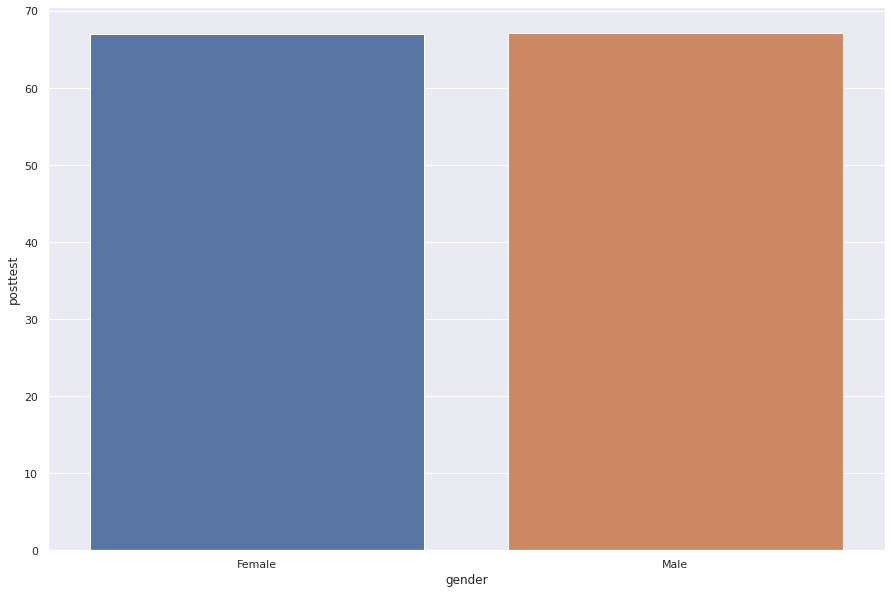

In [17]:
#check whether gender has any impact on posttest 
based_on_gender = dataframe.groupby(['gender']).agg({'posttest':'mean'}).reset_index()
fig = sns.barplot(data = based_on_gender,x='gender',y='posttest')

([<matplotlib.patches.Wedge at 0x7fec842cad10>,
 [Text(0.5971496397575011, 0.9238031758645815, 'Rural'),
  Text(-1.0992935737526708, -0.03941622389424551, 'Suburban'),
  Text(0.6298688065866992, -0.901812223519424, 'Urban')],
 [Text(0.3257179853222733, 0.5038926413806808, '31.7%'),
  Text(-0.5996146765923659, -0.021499758487770276, '37.7%'),
  Text(0.34356480359274494, -0.4918975764651403, '30.6%')])

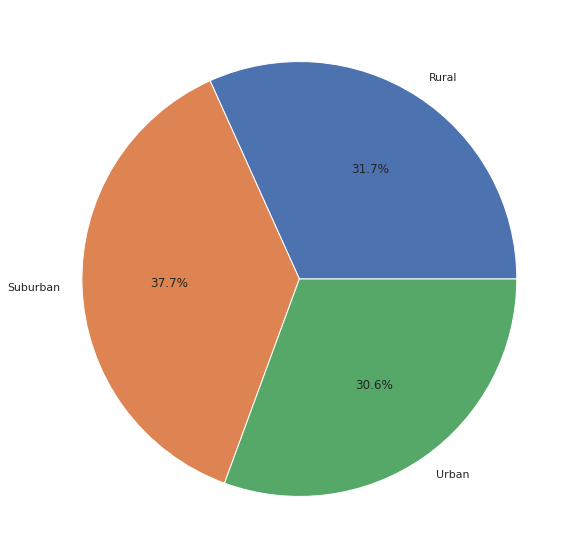

In [18]:
#check whether school_setting has any impact on posttest 
school_setting = dataframe.school_setting.value_counts()
based_on_school_setting = dataframe.groupby(['school_setting']).agg({'posttest':'mean'}).reset_index()
plt.pie(x=based_on_school_setting.posttest,labels=based_on_school_setting.school_setting,autopct="%.1f%%")

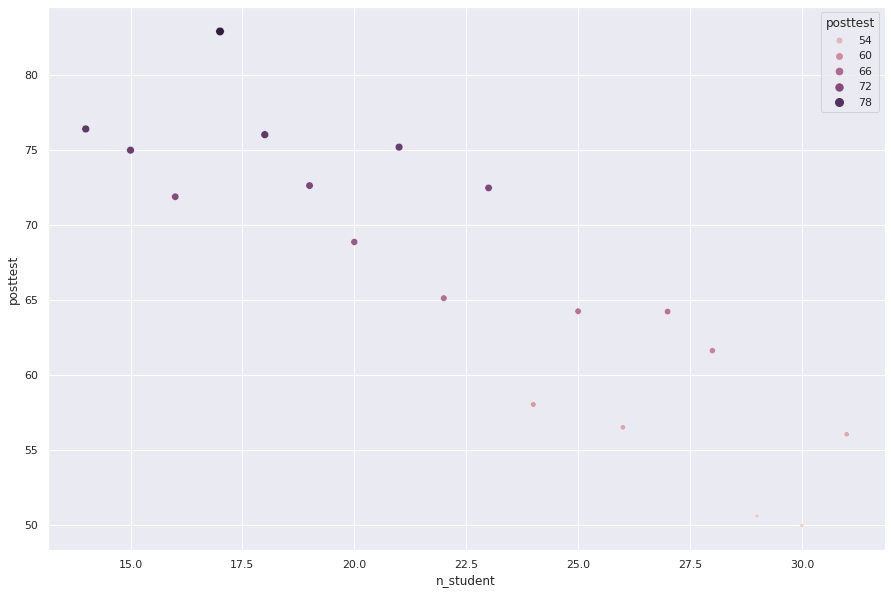

In [19]:
#check whether students count has any impact on posttest 
based_on_students_count = dataframe.groupby(['n_student']).agg({'posttest':'mean'}).reset_index()
fig = sns.scatterplot(data = based_on_students_count,x='n_student',y='posttest',size='posttest',hue='posttest',legend='auto')

In [20]:
#create heatmap for understanding the correlation matrix 
correlation_matrix = dataframe.drop(['school','student_id','gender','classroom'],axis=1)
correlation_matrix

,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...
2128,Urban,Public,Standard,30.0,Does not qualify,39.0,55.0
2129,Urban,Public,Standard,30.0,Qualifies for reduced/free lunch,38.0,46.0
2130,Urban,Public,Standard,30.0,Qualifies for reduced/free lunch,45.0,51.0
2131,Urban,Public,Standard,30.0,Qualifies for reduced/free lunch,46.0,53.0


In [21]:
#categorical to numerical transformation
replace_columns = {'school_setting':{'Urban':0, 'Suburban':1, 'Rural':2},'school_type':{'Public':0, 'Non-public':1},'teaching_method':{'Standard':0, 'Experimental':1},'lunch':{'Does not qualify':0, 'Qualifies for reduced/free lunch':1}}

In [22]:
#replace the transformed columns
correlation_matrix.replace(replace_columns,inplace=True)

In [23]:
#ensuring the transformation is done
correlation_matrix.head()

,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
0,0,1,0,20.0,0,62.0,72.0
1,0,1,0,20.0,0,66.0,79.0
2,0,1,0,20.0,0,64.0,76.0
3,0,1,0,20.0,0,61.0,77.0
4,0,1,0,20.0,0,64.0,76.0


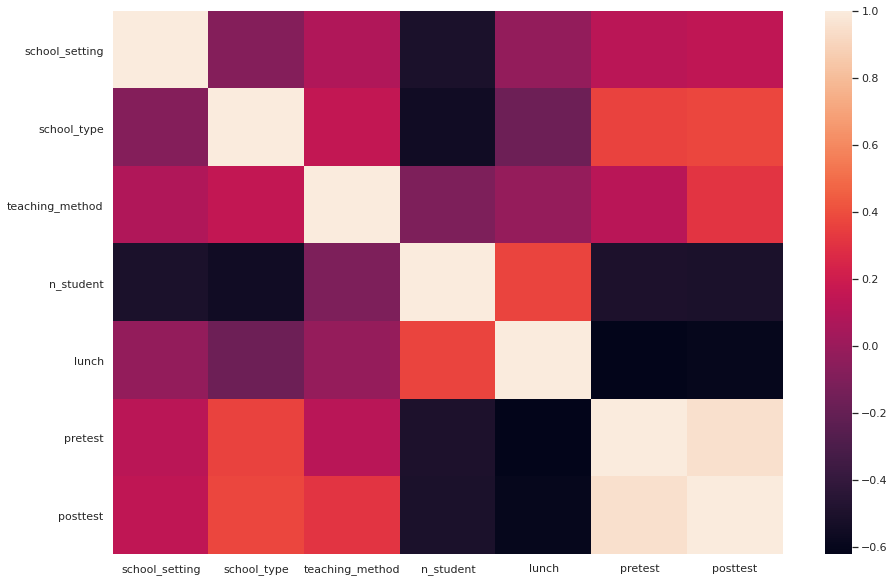

In [25]:
#visualising the correlated matrix
cm = correlation_matrix.corr()
sns.heatmap(cm,xticklabels=cm.columns,yticklabels=cm.columns)
plt.show()

# Manual Model Building


In [26]:
#separate the data for model building - not the actual dataset 
X = correlation_matrix.drop('posttest', axis=1)
y = correlation_matrix['posttest'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)

In [29]:
#implementing linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print (explained_variance_score(y_test, y_pred), y_pred.std())

0.9491578343003162 13.828101859511955


In [30]:
#implementing logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs= 4, random_state = 5).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print (explained_variance_score(y_test, y_pred), y_pred.std())

0.7546904751113549 12.567316390551424


In [31]:
#implementing SVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score, explained_variance_score
svr = SVR(gamma = 0.1).fit(X_train, y_train)
y_pred = svr.predict(X_test)
print (explained_variance_score(y_test, y_pred), y_pred.std())

0.8691748000142293 11.35615452509811


In [32]:
#implementing XGB
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print (explained_variance_score(y_test, y_pred), y_pred.std())

[18:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9505396132230326 13.849526


**Boosting model is really performing well compared to others. It needs to be optimised by hyperparameter**

# Automated Model Building using h20's AutoML

In [52]:
#Implementing AutoML to automate regression model building.
#initialise the h20 
h2o.init(nthreads=-1,max_mem_size=12)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphpq13ll9
  JVM stdout: /tmp/tmphpq13ll9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphpq13ll9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_rk40sk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [84]:
#separate dataframe for train and test 
#train upto 1494
#test from 1494 to 2133
train_dataframe = dataframe[:1494]
test_dataframe = dataframe[1494:]
train_dataframe

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
1489,UKPGS,Suburban,Public,08N,Standard,21.0,YXBYX,Male,Does not qualify,79.0,89.0
1490,UKPGS,Suburban,Public,08N,Standard,21.0,ZAH4F,Female,Does not qualify,87.0,93.0
1491,UKPGS,Suburban,Public,9AW,Standard,25.0,32A5K,Male,Does not qualify,81.0,94.0
1492,UKPGS,Suburban,Public,9AW,Standard,25.0,3S4PV,Female,Does not qualify,87.0,97.0


In [86]:
#parse the data in h2oframe
train = h2o.H2OFrame(train_dataframe)
test = h2o.H2OFrame(test_dataframe)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [87]:
#dataset manipulation
x = train.columns
y = "posttest"
x.remove(y)

In [90]:
#automl configuration and training
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [91]:
#leaderboard information about the models
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20210720_082909,8.81801,2.96951,8.81801,2.34228,0.0467449
StackedEnsemble_AllModels_AutoML_20210720_082909,8.85907,2.97642,8.85907,2.34878,0.0469144
GBM_5_AutoML_20210720_082909,8.95028,2.9917,8.95028,2.35605,0.0470264
GBM_2_AutoML_20210720_082909,9.1606,3.02665,9.1606,2.39457,0.0479018
DRF_1_AutoML_20210720_082909,9.33626,3.05553,9.33626,2.43634,0.0483511
GBM_3_AutoML_20210720_082909,9.3372,3.05568,9.3372,2.42434,0.0483451
GBM_1_AutoML_20210720_082909,9.44398,3.07311,9.44398,2.4446,0.0484667
GBM_4_AutoML_20210720_082909,9.51537,3.0847,9.51537,2.44211,0.0487645
XGBoost_3_AutoML_20210720_082909,9.71048,3.11616,9.71048,2.45202,0.0490655
XGBoost_1_AutoML_20210720_082909,10.1846,3.19133,10.1846,2.50023,0.0502501


In [92]:
#model inference part
pred = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:72: UserWarning: Test/Validation dataset column 'school' has levels not trained on: ["UUUQX", "VHDHF", "VKWQH", "VVTVA", "ZMNYA", "ZOWMK"]
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/job.py:72: UserWarning: Test/Validation dataset column 'classroom' has levels not trained on: ["1UU", "341", "4NN", "6C1", "7BL", "A93", "AE1", "CD8", "CII", "D33", ...8 not listed..., "P8I", "PGH", "Q0E", "QA2", "SSP", "TB5", "V77", "XXE", "YTB", "ZBH"]
  warnings.warn(w)


In [101]:
#combine the prediction with test dataset
data = test.cbind(pred)

In [102]:
#exploring the test dataset after adding prediction column
data.head()

school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,predict
UKPGS,Suburban,Public,9AW,Standard,25,8N6QZ,Female,Does not qualify,84,93,94.5953
UKPGS,Suburban,Public,9AW,Standard,25,B4VE7,Male,Does not qualify,82,93,94.4262
UKPGS,Suburban,Public,9AW,Standard,25,COAU1,Female,Does not qualify,81,93,94.4504
UKPGS,Suburban,Public,9AW,Standard,25,CPSG8,Male,Does not qualify,86,94,94.6581
UKPGS,Suburban,Public,9AW,Standard,25,DQYGC,Female,Does not qualify,83,90,94.5448
UKPGS,Suburban,Public,9AW,Standard,25,EUE94,Female,Does not qualify,85,88,94.6855
UKPGS,Suburban,Public,9AW,Standard,25,H2NHU,Female,Does not qualify,85,97,94.6855
UKPGS,Suburban,Public,9AW,Standard,25,H9GCW,Female,Does not qualify,86,93,94.7213
UKPGS,Suburban,Public,9AW,Standard,25,I4IR4,Male,Does not qualify,83,94,94.4809
UKPGS,Suburban,Public,9AW,Standard,25,INLHM,Female,Does not qualify,86,95,94.7213


In [105]:
#column name changes and result dataset creation
result = data[:,['posttest','predict']]
result.set_names(['Posttest','Predicted_Posttest'])

Posttest,Predicted_Posttest
93,94.5953
93,94.4262
93,94.4504
94,94.6581
90,94.5448
88,94.6855
97,94.6855
93,94.7213
94,94.4809
95,94.7213


In [106]:
#export the prediction data
h2o.export_file(result,path="/content/result_from_h2o_automl.csv",force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


In [108]:
#save the model for future needs (Model Serialisation)
h2o.save_model(aml.leader,path="/content/h2omodel_regression")

'/content/h2omodel_regression/StackedEnsemble_BestOfFamily_AutoML_20210720_082909'

In [109]:
#get the details from model leaderboard
model_ids = list(aml.leaderboard['modez_id'].as_data_frame().iloc[:,0])
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
metalearner = h2o.get_model(se.metalearner()['name'])


In [124]:
#summary of the metalearner
metalearner

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  metalearner_AUTO_StackedEnsemble_AllModels_AutoML_20210720_082909


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 0.3181 )",10,6,1,levelone_training_StackedEnsemble_AllModels_AutoML_20210720_082909




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 8.775652890765368
RMSE: 2.962372848033375
MAE: 2.3373848571181512
RMSLE: 0.04661377559723937
R^2: 0.9473551177583542
Mean Residual Deviance: 8.775652890765368
Null degrees of freedom: 1493
Residual degrees of freedom: 1487
Null deviance: 249042.7342704152
Residual deviance: 13110.82541880346
AIC: 7500.728205330247

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 8.85907490067763
RMSE: 2.97641981257309
MAE: 2.348781714006586
RMSLE: 0.04691436192468738
R^2: 0.9468546715872421
Mean Residual Deviance: 8.85907490067763
Null degrees of freedom: 1493
Residual degrees of freedom: 1487
Null deviance: 249186.27077942595
Residual deviance: 13235.457901612379
AIC: 7514.863202362919

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.3481822,0.11681026,2.5157018,2.3659997,2.3486009,2.3221834,2.1884255
1,mean_residual_deviance,8.85604,0.7237795,9.9871,8.82555,8.762477,8.739457,7.9656153
2,mse,8.85604,0.7237795,9.9871,8.82555,8.762477,8.739457,7.9656153
3,null_deviance,49837.254,5479.1978,41991.0,57191.758,51701.42,49243.46,49058.63
4,r2,0.9460293,0.010100618,0.9285797,0.9539011,0.9481315,0.94761366,0.95192045
5,residual_deviance,2647.0916,232.59076,2996.13,2630.014,2681.3179,2578.1396,2349.8564
6,rmse,2.9739535,0.12062487,3.1602373,2.9707828,2.960148,2.9562573,2.8223422
7,rmsle,0.04689984,0.0014002632,0.0485441,0.04810533,0.04551628,0.046757102,0.045576386



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_xval,deviance_se,training_rmse,training_deviance,training_mae,training_r2
0,,2021-07-20 08:29:38,0.000 sec,1,6563.53002,4.716368,1.0,0.318087,8.786519,8.85604,3.973746,2.962373,8.775653,2.337385,0.947355



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,GBM_5_AutoML_20210720_082909,11.051838,1.000000,0.873982
1,GBM_2_AutoML_20210720_082909,0.698209,0.063176,0.055215
2,GLM_1_AutoML_20210720_082909,0.546063,0.049409,0.043183
3,XGBoost_3_AutoML_20210720_082909,0.251999,0.022802,0.019928
4,DRF_1_AutoML_20210720_082909,0.081613,0.007385,0.006454
5,GBM_1_AutoML_20210720_082909,0.015663,0.001417,0.001239
6,GBM_3_AutoML_20210720_082909,0.000000,0.000000,0.000000
7,GBM_4_AutoML_20210720_082909,0.000000,0.000000,0.000000
8,XGBoost_1_AutoML_20210720_082909,0.000000,0.000000,0.000000
9,XGBoost_2_AutoML_20210720_082909,0.000000,0.000000,0.000000


Thanks for the opportunity and never miss to read the insights document
---

